# Machine Learning

In [12]:
# conda install -c conda-forge imbalanced-learn to install imblearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, c. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:  
P. Savicky  
Institute of Computer Science, AS of CR  
Czech Republic  
savicky '@' cs.cas.cz  

In [13]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df= pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [14]:
# Change class type to integer so that computer can understand it more easily
df["class"] = (df["class"] == "g").astype(int)

In [15]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


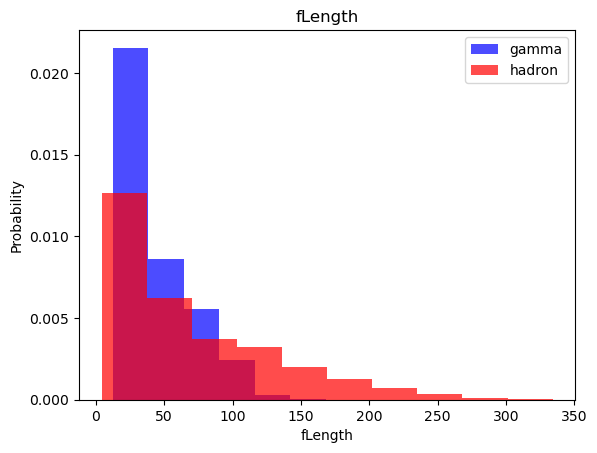

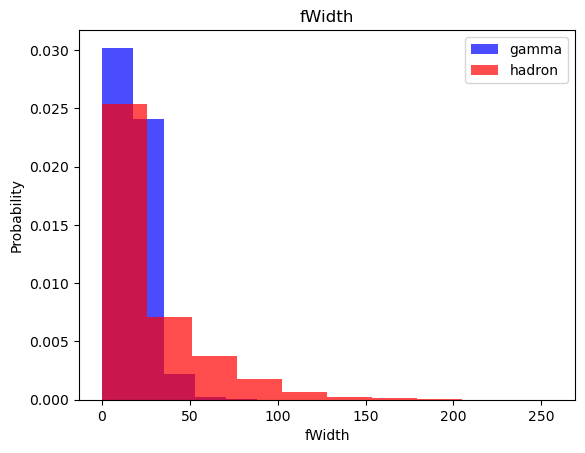

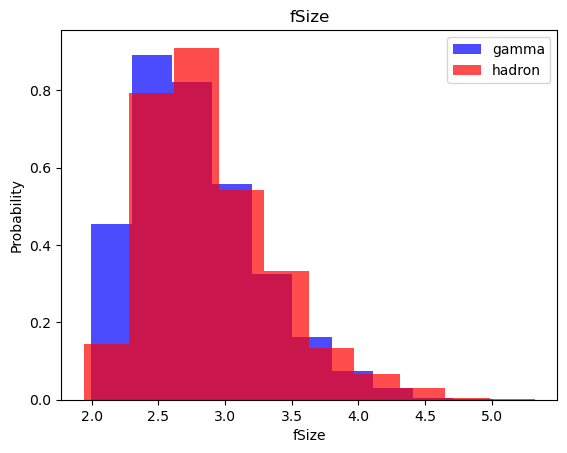

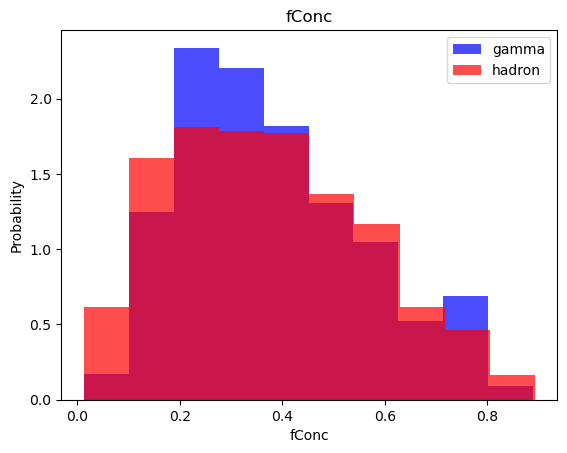

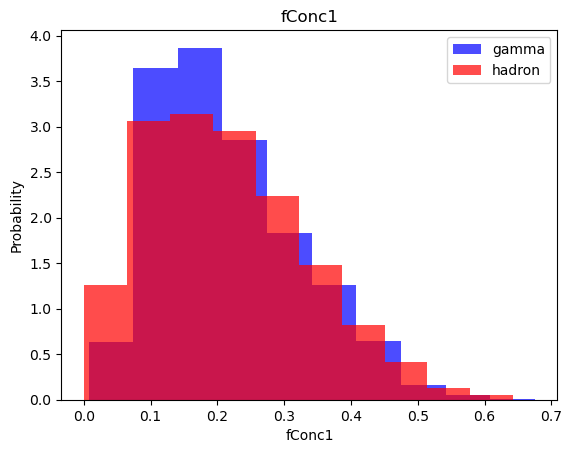

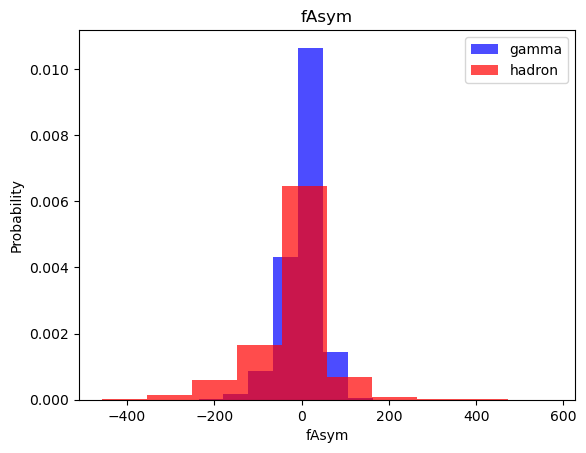

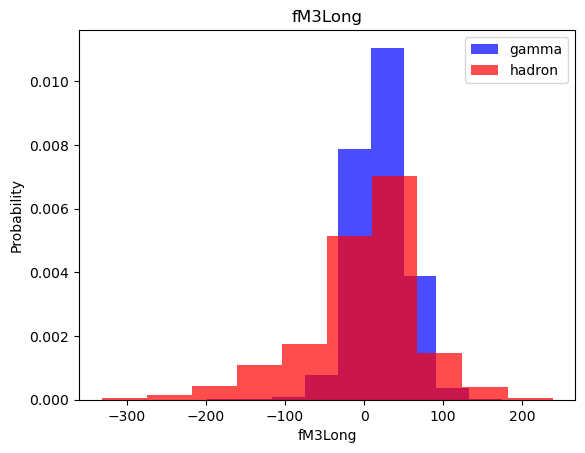

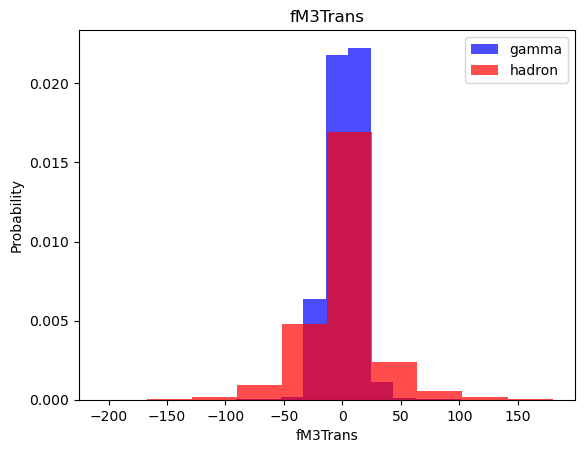

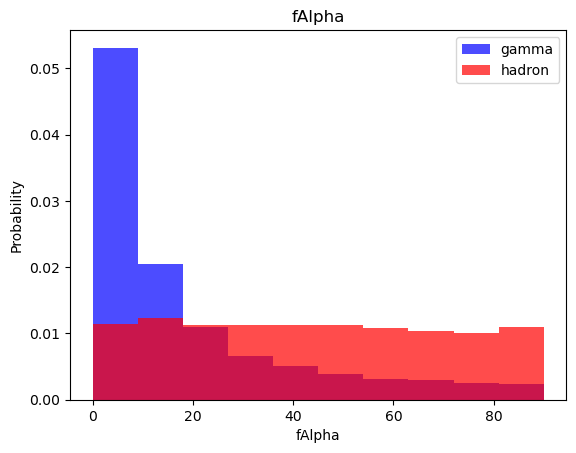

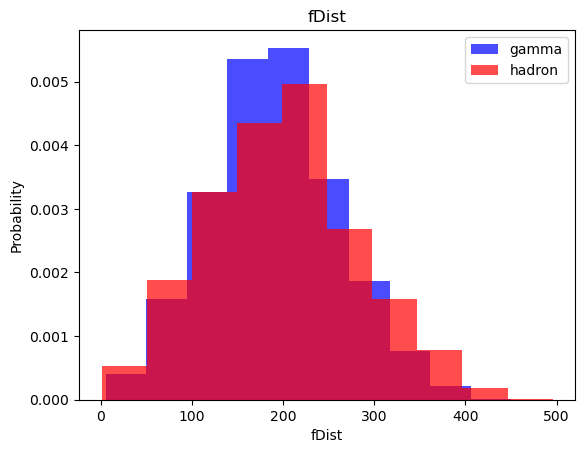

In [16]:
# df[df["class"] == 1][label] = Inside the data frame, get everything where class is equal to 1 / [label] = column name
# alpha = transparency
# density = normalizing so that it is easier to compare
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, Validation, Test datasets

In [25]:
# np.split() = split the data
# df.sample(farc = 1) = shuffling the data
# [int(0.6 * len(df)), int(0.8 * len(df))] = 60% of the data will be a training data, 60 to 80% (20%) will be a validation data, and 80 to 100% (20%) will be a test data

train, valid, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [18]:
# imported 'from sklearn.preprocessing import StandardScaler' at the top

def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [26]:
# Valid and test data are not seen yet. There's no way to sampling those data. That's why oversampling is false in those two data
# You also don't care about balancing valid and test data. You want to know if you have a random set of data that is unlabeld

train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [22]:
# There are around 7000 gamma data but there are only around 4000 hadron data. This is going to be an issue.
# 'Oversample' the training data can fix this issue. Increase the number of hadron dataset number so that it can match the gamma dataset number 

#print(len(train[train["class"] == 1])) #gamma
#print(len(train[train["class"] == 0])) #hadron

In [27]:
# After oversmapling, the label 1 and 0 length are the same (It is evenly rebalanced)

print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))


14746
7373
7373


# KNN (K-Nearest Neighbors)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn_model.predict(X_test)

In [23]:
print(y_pred)
print(y_test)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1304
           1       0.84      0.88      0.86      2500

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.81      0.81      0.81      3804

